<a href="https://colab.research.google.com/github/CarlosRabid/pypandapractice/blob/main/ejercicioVisDatosCCNpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carlos Cornejo

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
filename = ('/content/drive/MyDrive/Colab Notebooks/coding dojo/PTDataScience/PandasParaManipulaciónDeDatos/sales_predictions (1).csv')
salespredict_df = pd.read_csv(filename, delimiter=',')
salespredict_df.describe()
salespredict_df.info()
salespredict_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


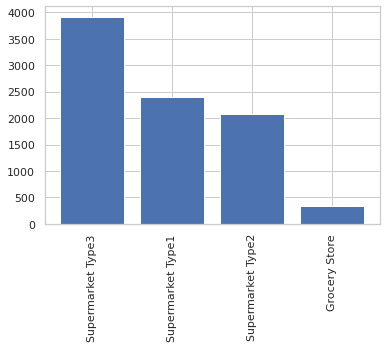

In [ ]:
dairyfilt = salespredict_df['Item_Type'] == 'Dairy'
dairyfilt = salespredict_df.loc[dairyfilt, :].groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False).head(5)
softfilt = salespredict_df['Item_Type'] == 'Soft Drinks'
softfilt = salespredict_df.loc[softfilt, :].groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False).head(5)
plt.bar(dairyfilt.index, dairyfilt.values);
plt.xticks(rotation = 90);

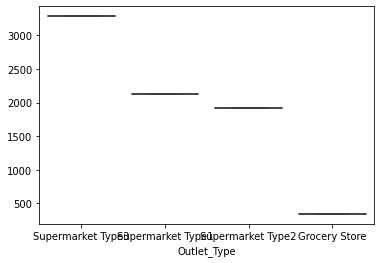

In [ ]:
sns.boxplot(x=softfilt.index, y=softfilt.values, data=salespredict_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


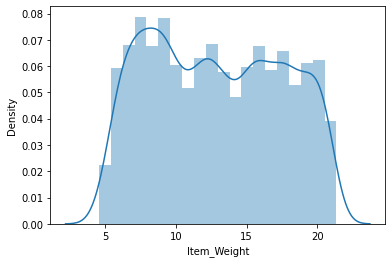

In [ ]:
sns.distplot(salespredict_df.Item_Weight)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


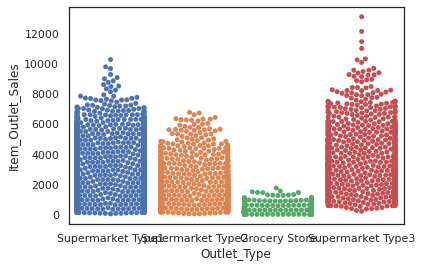

In [ ]:
sns.set()
sns.set_style("white")
sns.swarmplot(x=salespredict_df.Outlet_Type, y=salespredict_df.Item_Outlet_Sales, data=salespredict_df, orient="v")

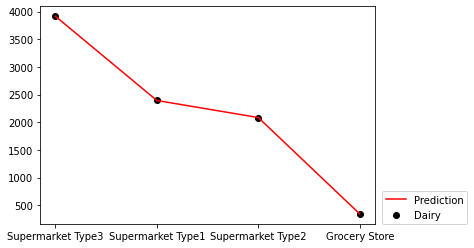

In [ ]:
figure, axes = plt.subplots(nrows = 1, ncols = 1);
axes.plot(dairyfilt.index, dairyfilt.values, c = 'r', label = 'Prediction')
axes.scatter(dairyfilt.index, dairyfilt.values, c= 'k', label = 'Dairy')
axes.legend(loc=(1.02,0))
plt.savefig('OOPlegendcutoff.png', dpi = 300)

In [11]:
media_peso=salespredict_df.Item_Weight.mean()
max_peso=salespredict_df.Item_Weight.max()
media_ventas=salespredict_df.Item_Outlet_Sales.mean()
max_ventas=salespredict_df.Item_Outlet_Sales.max()

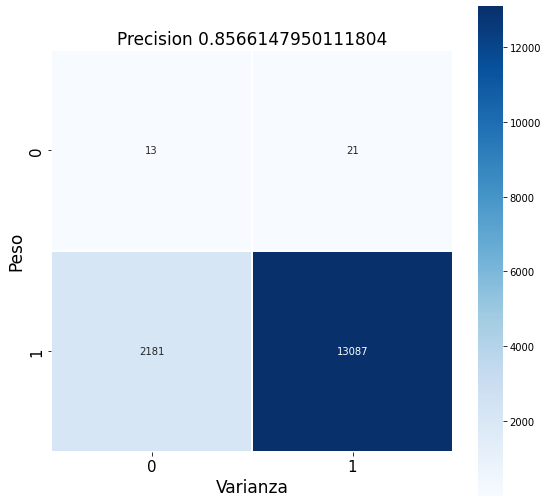

In [14]:
cm = np.array([[media_peso, max_peso], [media_ventas, max_ventas]])
score = (max_peso + max_ventas) / (max_peso + max_ventas + media_peso + media_ventas)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Peso', fontsize = 17);
plt.xlabel('Varianza', fontsize = 17);
plt.title('Precision {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)